<a href="https://colab.research.google.com/github/Hritik8005/Web-Application-for-Malaria-cell_classification/blob/main/Malaria%20cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Libraries to import
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import os
from keras.applications.inception_v3 import preprocess_input,InceptionV3
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define paths to your dataset
import pathlib
path = r'/content/drive/MyDrive/cell_images'
data_dir = pathlib.Path(path).with_suffix('')

In [ ]:
data = keras.utils.image_dataset_from_directory(
            directory = r'/content/drive/MyDrive/cell_images',
            labels = "inferred",
            label_mode ="int",
            batch_size = 32,
            image_size=(256,256))

Found 3697 files belonging to 2 classes.


In [ ]:
# types of classes present
class_name = data.class_names
class_name

['Parasitized1', 'Uninfected']

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

3697


In [ ]:
uninfected = list(data_dir.glob("Uninfected/*"))
parasitized1 = list(data_dir.glob("Parasitized1/*"))
print("Number of uninfected cells", len(uninfected))
print("Number of Parasitized cells", len(parasitized1))

Number of uninfected cells 1861
Number of Parasitized cells 1837


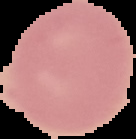

In [ ]:
import PIL
PIL.Image.open(uninfected[2])

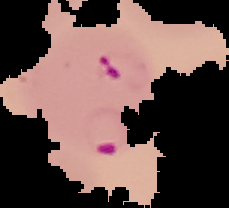

In [ ]:
PIL.Image.open(parasitized1[2])

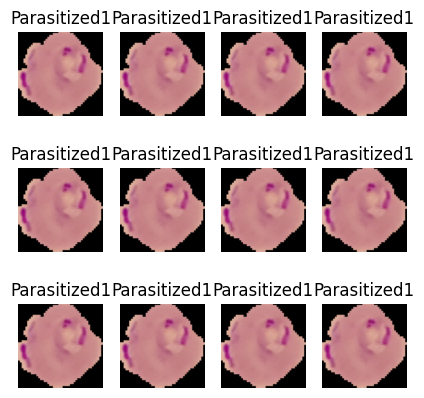

In [ ]:
# plotting the images
plt.figure(figsize=(5,5))
for image_batch,label_batch in data.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        plt.title(class_name[label_batch[0]])
        plt.axis("off")

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

In [ ]:
# Data Augmentation for training data
img_datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values to [0, 1]
    shear_range=0.2,      # Shear transformation
    zoom_range=0.2,       # Random zoom
    horizontal_flip=True, # Random horizontal flip
    rotation_range=40,    # Random rotation angle in degrees
    width_shift_range=0.2, # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    fill_mode='nearest',
    validation_split = 0.3, # splitting data into traning and validation
)

In [ ]:
training_data = img_datagen.flow_from_directory(
    data_dir,
    subset = "training",
    class_mode="binary",
    target_size = (img_width, img_height),
    batch_size = batch_size,
)

validation_data = img_datagen.flow_from_directory(
    data_dir,
    subset = "validation",
    class_mode="binary",
    target_size = (img_width, img_height),
    batch_size = batch_size
)

Found 2588 images belonging to 2 classes.
Found 1109 images belonging to 2 classes.


In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 10

history = model.fit(
    training_data,
    steps_per_epoch=training_data.samples // batch_size,
    validation_data=validation_data,
    validation_steps=validation_data.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
80/80 [==============================] - 997s 12s/step - loss: 0.6643 - accuracy: 0.5947 - val_loss: 0.6395 - val_accuracy: 0.6756
Epoch 2/10
80/80 [==============================] - 34s 423ms/step - loss: 0.4861 - accuracy: 0.8106 - val_loss: 1.1257 - val_accuracy: 0.8695
Epoch 3/10
80/80 [==============================] - 35s 444ms/step - loss: 0.3550 - accuracy: 0.8908 - val_loss: 0.5892 - val_accuracy: 0.8778
Epoch 4/10
80/80 [==============================] - 36s 448ms/step - loss: 0.3271 - accuracy: 0.8901 - val_loss: 0.7366 - val_accuracy: 0.8676
Epoch 5/10
80/80 [==============================] - 35s 432ms/step - loss: 0.3090 - accuracy: 0.8975 - val_loss: 0.3323 - val_accuracy: 0.8915
Epoch 6/10
80/80 [==============================] - 43s 544ms/step - loss: 0.2873 - accuracy: 0.9026 - val_loss: 0.6379 - val_accuracy: 0.8869
Epoch 7/10
80/80 [==============================] - 34s 432ms/step - loss: 0.2481 - accuracy: 0.9167 - val_loss: 0.2881 - val_accuracy: 0.9026


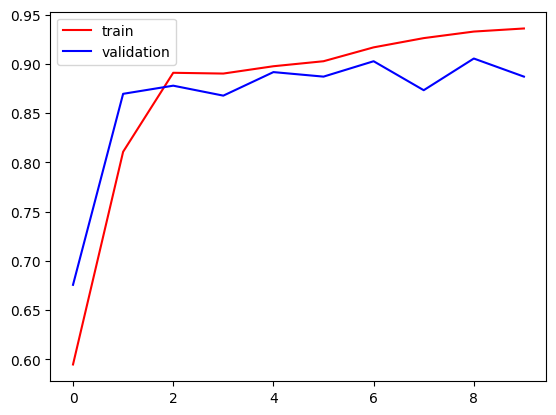

In [ ]:
# visualizing the train and validation accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

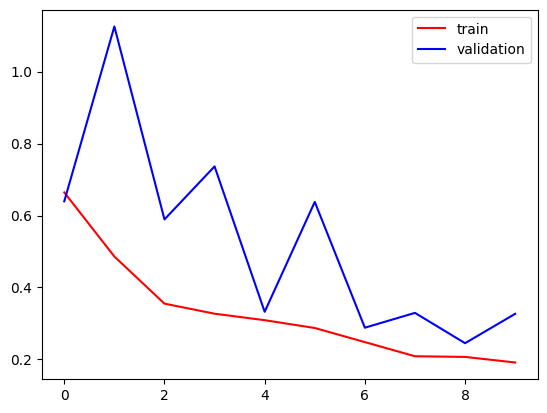

In [ ]:
# visualizing the losses
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on a test set
test_data_dir = '/content/drive/MyDrive/cell_images'
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 3697 images belonging to 2 classes.
116/116 [==============================] - 11s 94ms/step - loss: 0.1958 - accuracy: 0.9343
Test loss: 0.19575393199920654
Test accuracy: 0.9342710375785828


In [ ]:
# Save the model
model.save('cell_classification_cnn_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
# Load the trained model
model = load_model('cell_classification_cnn_model.h5')

# Load an image for prediction (replace 'path_to_image.jpg' with your image file)
#image_path = '/content/3.jpg'
image_path = '/content/drive/MyDrive/cell_images/Uninfected/C111P72ThinF_IMG_20150930_113003_cell_144.png'
img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image data

# Make a prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Class 1: This is uninfected image.")
else:
    print("Class 0: This is parasitized1 image.")

1/1 [==============================] - 0s 68ms/step
Class 1: This is uninfected image.


In [ ]:
!pip install pyngrok

In [ ]:
!pip install --upgrade streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIo

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title("Cell Image Classifier")
st.text("Provide URL of cell Image for image classification")

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/cell_classification_cnn_model.h5')
  return model

with st.spinner('Loading Model Into Memory....'):
  model = load_model()

classes = ['parasitized1','uninfected']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

return tf.image.resize(image, [224, 224])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

path = st.text_input('Enter Image URL to Classify.. ','https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.dreamstime.com%2Fstock-illustration-blood-smear-malaria-parasite-positive-thin-film-image65598998&psig=AOvVaw2WrvuU92rLBHSso_zov2C3&ust=1701266509752000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNCL8uXt5oIDFQAAAAAdAAAAABAM'
if path is not None:
  content = requests.get(path).content

  st.write("Predicted Class :")
  with st.spinner('classifying......'):
    label =np.argmax(model.predict(decode_img(content)), axis=1)
    st.write(classes [label[0]])
st.write("")
image = Image.open(BytesIO(content))
st.image(image, caption='Classifying cell Image', use_column_width=True)

Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax
import os
import h5py

st.header("Image class predictor")

def main():
  file_uploaded = st.file_uploader("Choose the file", type =['jpg', 'png', 'jpeg'])
  if file_uploaded is not None:
    image =Image.open(file_uploaded)
    figure = plt.figure()
    plt.imshow(image)
    plt.axis('off')
    result= predict_class(image)
    st.write(result)
    st.pyplot(figure)


def predict_class(image):
    classifier_model = tf.keras.models.load_model('/content/cell_classification_cnn_model.h5')
    shape = (150, 150, 3)  # Corrected input shape
    model = tf.keras.Sequential([hub.KerasLayer(classifier_model, input_shape=shape)])

    # Preprocess the image
    img = image.resize((150, 150))
    img = preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image data

    # Make a prediction
    prediction = model.predict(img)

    # Interpret the prediction
    if prediction[0][0] > 0.5:
      result = "Class 1: This is uninfected image."
    else:
      result = "Class 0: This is parasitized1 image."

    return result

if __name__ ==  "__main__":
  main()

Overwriting app.py


In [ ]:
!ngrok authtoken 2YoBbnCTxEn7g18zuxNZpdbFeyF_4dvPasiZUBQT9rJr9tG25

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
import pyngrok
from pyngrok import ngrok
ngrok.set_auth_token('2YoBbnCTxEn7g18zuxNZpdbFeyF_4dvPasiZUBQT9rJr9tG25')

In [ ]:
port = 8501
tunnel = ngrok.connect(port)

In [ ]:
print(tunnel.public_url)

https://26b2-35-204-160-140.ngrok-free.app


In [ ]:
https://www.google.com/url?sa=i&url=https%3A%2F%2Fdepositphotos.com%2Fphoto%2Fblood-smear-malaria-parasite-positive-in-thin-film-96940380.html&psig=AOvVaw0S4cTB0kC6dM44MJ4Edpel&ust=1701944161179000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCLjQnKLK-oIDFQAAAAAdAAAAABAF

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-12-07 11:25:36--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  14.0MB/s    in 0.9s    

2023-12-07 11:25:37 (14.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw("./ngrok http 8501 &")

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
'import sys, json; print("Execute the next line and then go to the ngrok URL: "+json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next line and then go to the ngrok URL: https://01d3-35-223-17-69.ngrok-free.app


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.17.69:8501

[ColabKernelApp] ERROR | Unable to initialize signal:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 583, in initialize
    self.init_signal()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 435, in init_signal
    signal.signal(signal.SIGINT, signal.SIG_IGN)
  File "/usr/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 192, in _handle_events
    handler_func(fil